In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

# I. Chargement des données :

In [2]:
df_jeux_up = pd.read_csv("../data/details_clean.csv")

In [3]:
df_jeux_up.head(5)

,Nombre d'avis,Note,categories,description,titre,_id,creators,illustrators,editors,distributors,duration,enfant,ado,adulte,solo,duo,multi
0,19.0,7.58,NaN,\n Marvel United : Unis c...,Marvel United,marvel-united,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN,45.0,0,1,1,1,0,1
1,33.0,7.39,NaN,"\n Chaque année, au print...",Mariposas,mariposas,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN,60.0,0,1,1,0,1,1
2,28.0,8.18,Enchères|Aventures dans la jungle|Collection /...,\n Vous êtes à la tête d’...,Quetzal,quetzal,Alexandre Garcia,Nastya Lehn,Gigamic,NaN,45.0,0,1,1,0,1,1
3,4.0,9.00,NaN,\n Un Kit de démarrage co...,Alien - Kit de Démarrage,alien-kit-de-demarrage,NaN,NaN,Arkhane Asylum Publishing,NaN,NaN,0,1,1,1,0,1
4,72.0,8.75,Card-driven|Combinaison|Coopération|Deck build...,\n Le Dr Foo a créé une t...,The LOOP,the-loop,Maxime Rambourg et Théo Rivière,Simon Caruso,Catch Up Games,NaN,60.0,0,1,1,1,0,1


In [4]:
df_avis_up = pd.read_csv("../data/avis_clean.csv")

In [5]:
df_avis_up.head(5)

,comment,date_published,title_review,title,note,author,title_id_jeu
0,"Lorsque le jeu est jeu, bon, réflexif, joli po...",2021,Voyages sur les ailes des papillons,Mariposas,8.0,Monsieur Guillaume,mariposas
1,Comment continuer après un mega hit ? Simpleme...,2020,le festival de Michoacan,Mariposas,7.0,morlockbob,mariposas
2,"Vin d'jeu: Avec Mariposas, Elizabeth Hargrave ...",2021,Vivez la migration des monarques,Mariposas,7.0,SwatSh,mariposas
3,NaN,2020,Bon,Mariposas,8.0,Timi JeuxATheme,mariposas
4,"Très joli bijou que ce jeu-là ! Le matériel, l...",2021,Envolez-moi,Mariposas,9.0,prunelles,mariposas


# II. Statistiques

## 1. Répartitions des valeurs NaN dans la base de données des jeux : 

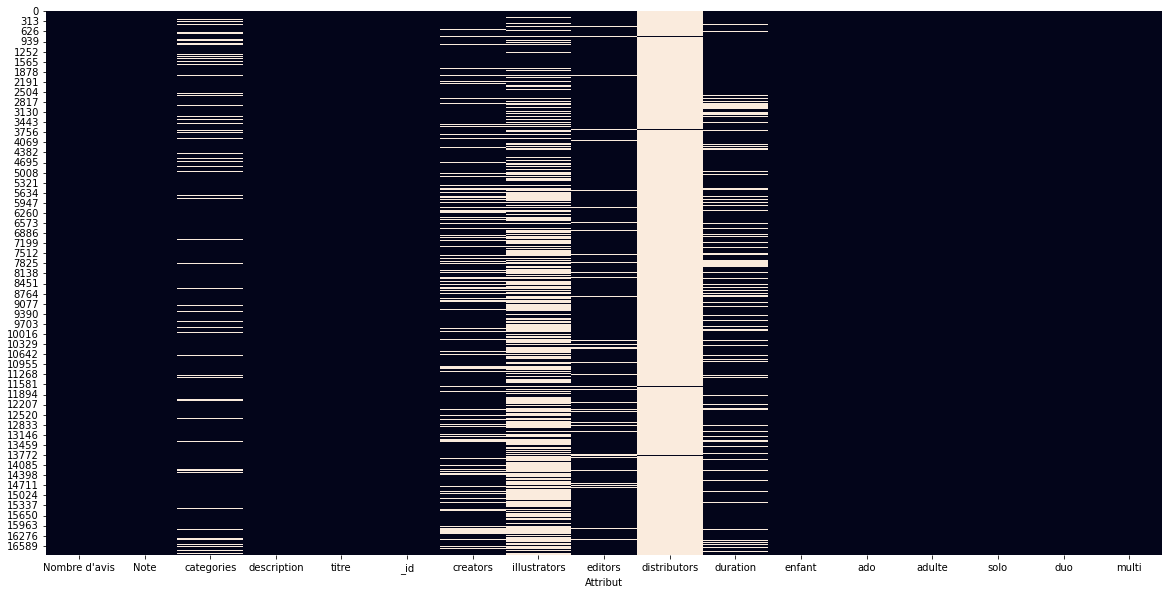

In [6]:
plt.figure(figsize=(20,10))
sns.heatmap(df_jeux_up.isna(), cbar=False)
plt.xlabel("Attribut")
plt.show()

In [7]:
print("Le % de NaN pour l'attribut illustrators :", 100 * np.where(df_jeux_up["illustrators"].isna(), 1, 0).sum() / len(df_jeux_up["illustrators"]), "%")

Le % de NaN pour l'attribut illustrators : 56.48669471937415 %


In [8]:
print("Le % de NaN pour l'attribut distributors :", 100 * np.where(df_jeux_up["distributors"].isna(), 1, 0).sum() / len(df_jeux_up["distributors"]), "%")

Le % de NaN pour l'attribut distributors : 99.03395958039471 %


In [9]:
print("Le % de NaN pour l'attribut categories :", 100 * np.where(df_jeux_up["categories"].isna(), 1, 0).sum() / len(df_jeux_up["categories"]), "%")

Le % de NaN pour l'attribut categories : 13.026729093818526 %


On remarque que : 

- L'attribut `distributors` est quasi-vide (c'est à dire contient beaucoup de NaN, 99% sont des NaN), on peut le supprimer.

- Que certain jeux n'ont pas de categories (13% jeux sans categories)

- Les attributs du castings c'est les données les plus manquantes

## 2. Répartition des notes

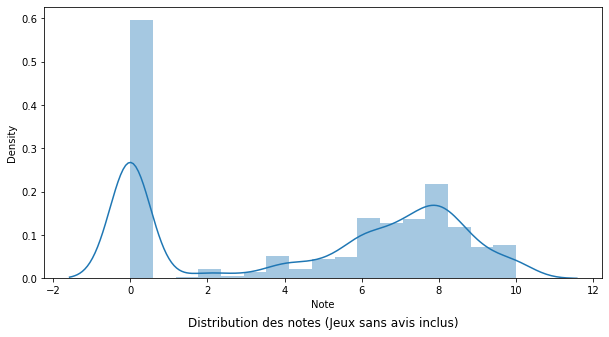

In [10]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up["Note"])
plt.title("Distribution des notes (Jeux sans avis inclus)", y=-0.2)
plt.show()

In [11]:
print("Le % des notes nulles :", 100 * np.where(df_jeux_up["Note"] == 0, 1, 0).sum() / len(df_jeux_up["Note"]), "%")

Le % des notes nulles : 35.07971315118829 %


- On remarque qu'il y a beaucoup de jeux avec une note de 0, pour expliquer ce phénomène on pose comme hypothèse que 0 est la note par défaut des jeux sans avis, 35% de jeux avec une note de 0

### On va essayer de prouver cette hypothèse

In [12]:
jeux_avis = df_avis_up["title_id_jeu"].value_counts()

In [13]:
values = jeux_avis.keys().tolist()
counts = jeux_avis.tolist()
value_dict = dict(zip(values, counts))

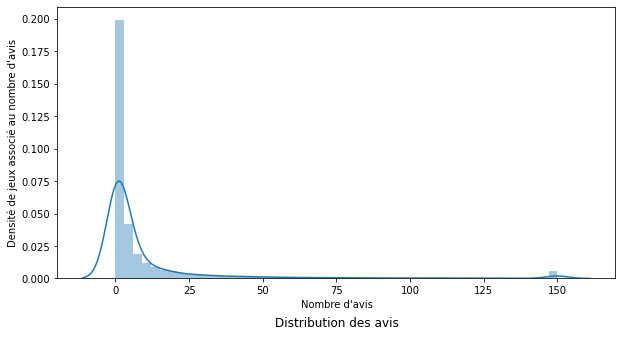

In [14]:
plt.figure(figsize=(10, 5))
sns.distplot(df_jeux_up['_id'].map(value_dict).fillna(0))
plt.title("Distribution des avis", y=-0.2)
plt.xlabel("Nombre d'avis")
plt.ylabel("Densité de jeux associé au nombre d'avis")
plt.show()

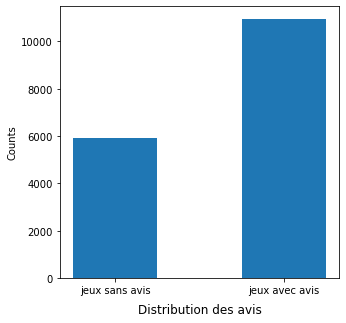

In [43]:
plt.figure(figsize=(5, 5))
data = np.where(df_jeux_up['_id'].isin(values), 1, 0)
_, counts = np.unique(data, return_counts=True)

plt.bar(["jeux sans avis", "jeux avec avis"], counts, align='center', width=0.5)
plt.title("Distribution des avis", y=-0.15)
plt.ylabel("Counts")
plt.show()

In [16]:
nb_avis_jeux = df_jeux_up['_id'].map(value_dict).fillna(0)
print("Le % des jeux sans avis :", 100 * np.where(nb_avis_jeux == 0, 1, 0).sum() / len(nb_avis_jeux), "%")

Le % des jeux sans avis : 35.18639246132875 %


- On a le même % de jeux sans avis que de jeux avec une note de 0 (35%)

### On vérifie que les jeux sans avis ont bien une note par défaut de 0

<Figure size 720x360 with 0 Axes>

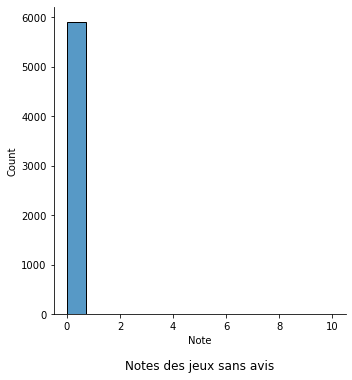

In [17]:
plt.figure(figsize=(10, 5))
sns.displot(df_jeux_up[~df_jeux_up['_id'].isin(values)]["Note"])
plt.title("Notes des jeux sans avis", y=-0.2)
plt.show()

### La vraie répartition des notes

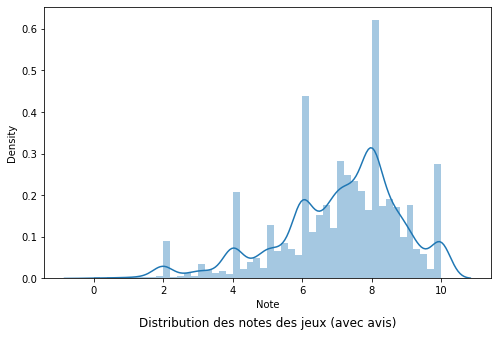

In [45]:
plt.figure(figsize=(8, 5))
sns.distplot(df_jeux_up[df_jeux_up['_id'].isin(values)]["Note"])
plt.title("Distribution des notes des jeux (avec avis)", y=-0.2)
plt.show()

## 3. Les categories d'age : 

In [19]:
n_enfant_uniq = len(df_jeux_up.query('enfant == 1 & ado == 0 & adulte == 0'))
n_ado_uniq    = len(df_jeux_up.query('enfant == 0 & ado == 1 & adulte == 0'))
n_adulte_uniq = len(df_jeux_up.query('enfant == 0 & ado == 0 & adulte == 1'))
n_enfant_ado  = len(df_jeux_up.query('enfant == 1 & ado == 1 & adulte == 0'))
n_ado_adulte  = len(df_jeux_up.query('enfant == 0 & ado == 1 & adulte == 1'))
n_tout        = len(df_jeux_up.query('enfant == 1 & ado == 1 & adulte == 1'))

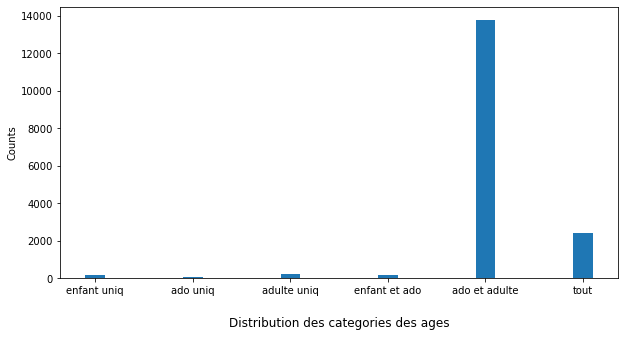

In [20]:
plt.figure(figsize=(10, 5))

plt.bar(["enfant uniq", "ado uniq", "adulte uniq", "enfant et ado", "ado et adulte", "tout"], 
        [n_enfant_uniq, n_ado_uniq, n_adulte_uniq,    n_enfant_ado,    n_ado_adulte, n_tout], 
        width=0.2)

plt.title("Distribution des categories des ages", y=-0.2)
plt.ylabel("Counts")
plt.show()

In [21]:
df_jeux_up.head()

,Nombre d'avis,Note,categories,description,titre,_id,creators,illustrators,editors,distributors,duration,enfant,ado,adulte,solo,duo,multi
0,19.0,7.58,NaN,\n Marvel United : Unis c...,Marvel United,marvel-united,Eric Lang et Andrea Chiarvesio,Édouard Guiton,CMON Limited,NaN,45.0,0,1,1,1,0,1
1,33.0,7.39,NaN,"\n Chaque année, au print...",Mariposas,mariposas,Elizabeth Hargrave,Matt Paquette et Indi Maverick,Gigamic,NaN,60.0,0,1,1,0,1,1
2,28.0,8.18,Enchères|Aventures dans la jungle|Collection /...,\n Vous êtes à la tête d’...,Quetzal,quetzal,Alexandre Garcia,Nastya Lehn,Gigamic,NaN,45.0,0,1,1,0,1,1
3,4.0,9.00,NaN,\n Un Kit de démarrage co...,Alien - Kit de Démarrage,alien-kit-de-demarrage,NaN,NaN,Arkhane Asylum Publishing,NaN,NaN,0,1,1,1,0,1
4,72.0,8.75,Card-driven|Combinaison|Coopération|Deck build...,\n Le Dr Foo a créé une t...,The LOOP,the-loop,Maxime Rambourg et Théo Rivière,Simon Caruso,Catch Up Games,NaN,60.0,0,1,1,1,0,1


## 4. Les modes de jeux : 

In [22]:
solo_uniq = len(df_jeux_up.query('solo == 1 & duo == 0 & multi == 0'))
duo_uniq = len(df_jeux_up.query('solo == 0 & duo == 1 & multi == 0'))
multi_uniq = len(df_jeux_up.query('solo == 0 & duo == 0 & multi == 1'))
solo_et_duo = len(df_jeux_up.query('solo == 1 & duo == 1 & multi == 0'))
duo_et_multi = len(df_jeux_up.query('solo == 0 & duo == 1 & multi == 1'))
tout = len(df_jeux_up.query('solo == 1 & duo == 1 & multi == 1'))

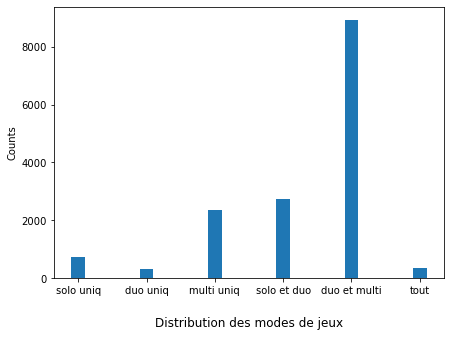

In [23]:
plt.figure(figsize=(7, 5))

plt.bar(["solo uniq", "duo uniq", "multi uniq", "solo et duo" , "duo et multi", "tout"], 
        [solo_uniq,    duo_uniq,   multi_uniq,   solo_et_duo,    duo_et_multi,   tout], 
        width=0.2, align='center')

plt.title("Distribution des modes de jeux", y=-0.2)
plt.ylabel("Counts")
plt.show()

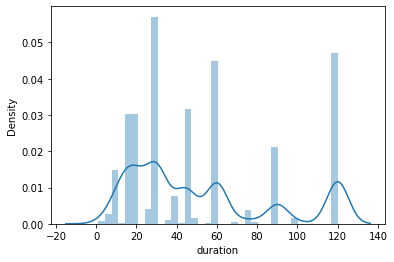

In [24]:
duration = df_jeux_up[df_jeux_up["duration"].notna()]["duration"]
sns.distplot(duration)
plt.show()